# Firing statistics of ground truths

Ground truths:

* **hybrid_janelia**
    * 60 recordings, different channel counts and durations, two unique populations
* **synth_monotrode**: 
    * 111 recordings, fixed channel count, different units and unit counts
* **buccino 2020**
    * 10 min neuropixel recording MEAREC hybrid with 250 units (200 excit. 50 inhib.) from BBP's NMC

Note: 
    * MEAREC: https://zenodo.org/record/3696926

## Setup

```bash
# install python3.9 in a spack environment 
spack env create spack_env_spikeforest spack_env_spikeforest.yaml
spack install
spack env activate spack_env_spikeforest -p
. /gpfs/bbp.cscs.ch/ssd/apps/bsd/2023-02-23/spack/share/spack/setup-env.sh

# create python virtual environment
python3.9 -m venv env_spikeforest
source env_spikeforest/bin/activate
pip install -r requirements_spikeforest.txt
````

```bash
# One-time initialization and follow instructions
kachery-cloud-init
```

In [24]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
import spikeforest as sf
import os 
import spikeinterface as si

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config

# HYBRID JANELIA
# ---------------
# SET PARAMETERS
EXPERIMENT = "supp/hybrid_janelia"       # specifies the experiment 
SIMULATION_DATE = "2023_06_10"      # specifies the run (date)

# SETUP CONFIG
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()

# SETUP PATHS
JANELIA_FR_FILE_PATH = data_conf["sorting"]["ground_truth"]["firing_rates"]


# SYNTH MONOTRODE
# ---------------
# SET PARAMETERS
EXPERIMENT = "synth_monotrode"       # specifies the experiment 
SIMULATION_DATE = "2023_06_10"      # specifies the run (date)

# SETUP CONFIG
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()

# SETUP PATHS
SYNTH_MONOTRODE_FR_FILE_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["firing_rates"]


# BUCCINO 2020
# ------------
EXPERIMENT = "buccino_2020"
SIMULATION_DATE = "2020"
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()

# SETUP PATHS
BUCCI_RECORDING_PATH = data_conf["recording"]["input"]
BUCCI_GT_SORTING_PATH = data_conf["sorting"]["ground_truth"]["output"]
BUCCI_FR_FILE_PATH = data_conf["sorting"]["ground_truth"]["firing_rates"]


# Our NMC
# -------
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_02_19"
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()

NMC_RECORDING_PATH = data_conf["preprocessing"]["output"]["trace_file_path"]
NMC_GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]
NMC_FR_FILE_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["firing_rates"]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-06-12 14:49:40,706 - root - utils.py - get_config - INFO - Reading experiment config.
2023-06-12 14:49:40,711 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-06-12 14:49:40,713 - root - utils.py - get_config - INFO - Reading experiment config.
2023-06-12 14:49:40,716 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-06-12 14:49:40,717 - root - utils.py - get_config - INFO - Reading experiment config.
2023-06-12 14:49:40,727 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-06-12 14:49:40,728 - root - utils.py - get_config - INFO - Reading experiment config.
2023-06-12 14:49:40,752 - root - utils.py - get_config - INFO - Reading experiment config. - done


## List all ground truth recordings

In [2]:
hybrid_janelia_uri = "sha1://43298d72b2d0860ae45fc9b0864137a976cb76e8?hybrid-janelia-spikeforest-recordings.json"
synth_monotrode_uri = "sha1://3b265eced5640c146d24a3d39719409cceccc45b?synth-monotrode-spikeforest-recordings.json"
paired_boyden_uri = "sha1://849e53560c9241c1206a82cfb8718880fc1c6038?paired-boyden-spikeforest-recordings.json"
paired_kampff_uri = "sha1://b8b571d001f9a531040e79165e8f492d758ec5e0?paired-kampff-spikeforest-recordings.json"
paired_english_uri = "sha1://dfb1fd134bfc209ece21fd5f8eefa992f49e8962?paired-english-spikeforest-recordings.json"

### Paired-boyden firing rate distribution

see 3 for mapping of units and recordings

* one study name "paired_boyden32c"
* layers 5, 2/3
    * for neuron 419
        - recording 419_7 is actually 419_1_7 (natural scene) 
        - recording 419_8 is actually 419_1_8 (natural scene)

In [3]:
# # get study datasets uri
# study_uri = 'sha1://849e53560c9241c1206a82cfb8718880fc1c6038?paired-boyden-spikeforest-recordings.json'

# # set all recordings
# # rec_names = ["419_1_7", "419_1_8", "513_2_2", "513_2_3", "513_1_1", "513_1_2", "531_2_1", "531_2_2", "624_2_1", "624_2_2", "624_5_1", "624_5_2", "509_1_1", "509_1_2", "1103_1_1", "915_8_1", "915_10_1", "915_17_1", "915_19_1"]

# # select subset that are actually available
# rec_names = ["419_1_7", "419_1_8", "509_1_1", "1103_1_1"]
# study_name = "paired_boyden32c"

## Hybrid janelia

In [5]:
# study_uri = 'sha1://43298d72b2d0860ae45fc9b0864137a976cb76e8?hybrid-janelia-spikeforest-recordings.json'

# # get list of recordings for the hybrid_janelia study
# all_recordings = sf.load_spikeforest_recordings(study_uri)

# # print the first study name and its first associated recording
# print("study_name:", all_recordings[0].study_name)
# print("recording_name:", all_recordings[0].recording_name)

# # get the first study name and its recording printed above
# recordings = sf.load_spikeforest_recording(study_name=all_recordings[0].study_name, recording_name=all_recordings[0].recording_name, uri=study_uri)

# # load recording extractor
# recording = recordings.get_recording_extractor()

# # load ground truth sorting extractor
# sorted_true = recordings.get_sorting_true_extractor()

# # print spikeinterface extractors info
# print(f'Recording extractor info: {recording.get_num_channels()} channels, {recording.get_sampling_frequency()} Hz, {recording.get_total_duration()} sec')
# print(f'Sorting extractor info: unit ids = {sorted_true.get_unit_ids()}, {sorted_true.get_sampling_frequency()} Hz')
# for unit_id in sorted_true.get_unit_ids():
#     st = sorted_true.get_unit_spike_train(unit_id=unit_id)
#     print(f'Unit {unit_id}: {len(st)} events')

### Define custom functions

In [48]:
def plot_each_rec(uri, rec_i):

    # get recording
    all_recordings = sf.load_spikeforest_recordings(uri)
    study_name = all_recordings[rec_i].study_name
    recording_name = all_recordings[rec_i].recording_name
    print(study_name)
    print(recording_name)

    x = [
        R
        for R in all_recordings
        if R.study_name == study_name and R.recording_name == recording_name
    ]
    if len(x) == 0:
        raise Exception(f"Recording not found: {study_name}/{recording_name}")
    R = x[0]

    # load recording extractor
    recording = R.get_recording_extractor()

    # load ground truth sorting extractor
    sorted_true = R.get_sorting_true_extractor()

    # calculate firing rate
    firing_rate = []
    for unit_id in sorted_true.get_unit_ids():

        # get spike train
        st = sorted_true.get_unit_spike_train(unit_id=unit_id)

        # calculate firing rate
        firing_rate.append(len(st) / recording.get_total_duration())

    print("unit count:", len(sorted_true.get_unit_ids()))

    # plot distribution
    _, axis = plt.subplots(1, 1, figsize=(5, 2))
    axis.hist(firing_rate, bins=np.arange(0, 1.1 * max(firing_rate), 0.1), width=0.2)
    axis.set_xticks(np.arange(0, 1.1 * max(firing_rate), 1))
    axis.set_xlabel("firing rate (Hz)")
    axis.set_ylabel("neuron (count)")
    axis.spines[["right", "top"]].set_visible(False)
    return sorted_true, firing_rate

In [47]:
# count recordings
uri = "sha1://43298d72b2d0860ae45fc9b0864137a976cb76e8?hybrid-janelia-spikeforest-recordings.json"
all_recordings = sf.load_spikeforest_recordings(uri)
len(all_recordings)

60


### Compare spike train to identify unique neuron populations



hybrid_drift_siprobe
rec_64c_600s_12
unit count: 74
hybrid_static_tetrode
rec_4c_600s_12
unit count: 74
spike count: 241585
spike count: 241585
spikes: [     148      184      236 ... 17976050 17976088 17976108]
spikes: [     148      184      236 ... 17976050 17976088 17976108]


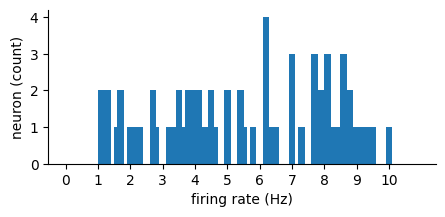

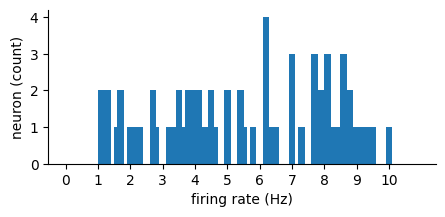

In [8]:
# compare firing rate histograms
rec_i = 20
sorted_true_0, fr_0 = plot_each_rec(uri, rec_i)

rec_i = 25
sorted_true_1, fr_1 = plot_each_rec(uri, rec_i)

print("spike count:", len(sorted_true_0.get_all_spike_trains()[0][0]))
print("spike count:", len(sorted_true_1.get_all_spike_trains()[0][0]))
print("spikes:", sorted_true_0.get_all_spike_trains()[0][0][:241283])
print("spikes:", sorted_true_1.get_all_spike_trains()[0][0][:241283])

4 channel count conditions (3 reps per condition) x 2 durations

Two distinct neural populations are simulated:  

  1. population 1 made in groupe 1 (1200 secs), 2 (600 secs)  
  2. population 2 made of groupe 3   

groupe 1: these are identical

    * 16C
        * REC_16C_1200S_11 #0
        * REC_16C_1200S_21 #1
        * REC_16C_1200S_31 #2
    * 32C
        * rec_32c_1200s_11 # 9 
        * rec_32c_1200s_21 # 10
        * rec_32c_1200s_31 # 11
    * 64c
        * rec_64c_1200s_11 # 18
    * 4c
        * rec_4c_1200s_11 # 21
        * rec_4c_1200s_21 # 22
        * rec_4c_1200s_31 # 23


groupe 2: these are identical (duration is half of group 1)

    * 16C
        * REC_16C_600S_11 #3
        * REC_16C_600S_21 #5
        * REC_16C_600S_31 #7
    * 32C
        * rec_32c_600s_11 #12
        * rec_32c_600s_21 #14
        * rec_32c_600s_31 #16
    * 64C
        * rec_64c_600s_11 #19
    * 4c
        * rec_4c_600s_11 # 24

groupe 3: these are identical (spike train differ from groupe 1)

    * 16C
        * REC_16C_600S_12 # 4
        * REC_16C_600S_22 # 6 
        * REC_16C_600S_32 # 8
    * 32C
        * rec_32c_600s_12 # 13
        * rec_32c_600s_22 # 15
        * rec_32c_600s_32 # 17
    * 64C
        * rec_64c_600s_12 # 20
    * 4c
        * rec_4c_600s_12 # 25

TODO: 

 - continue listing the recordings there are 60 of them

## Plot firing rate dist. for Hybrid Janelia's two unique neuron populations

hybrid_drift_siprobe
rec_16c_1200s_11
unit count: 74
hybrid_drift_siprobe
rec_16c_600s_12
unit count: 74


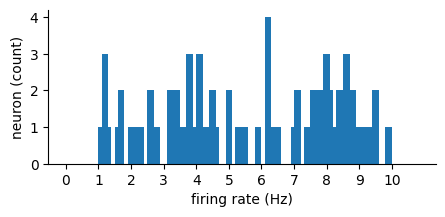

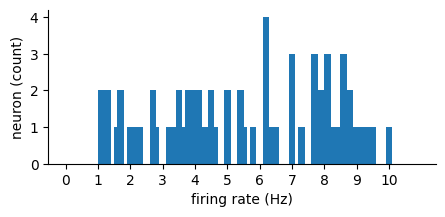

In [49]:
# compare firing rate histograms
uri = "sha1://43298d72b2d0860ae45fc9b0864137a976cb76e8?hybrid-janelia-spikeforest-recordings.json"

# firing rate hist. population 1
rec_i = 0
sorted_true_pop_1, fr_1 = plot_each_rec(uri, rec_i)

# firing rate hist. population 2
rec_i = 4
sorted_true_pop_2, fr_2 = plot_each_rec(uri, rec_i)

In [61]:
# concatenate population into one
firing_rates_janelia = fr_1 + fr_2

# save firing rates
parent_path = os.path.dirname(JANELIA_FR_FILE_PATH)
if not os.path.isdir(parent_path):
    os.makedirs(parent_path)
np.save(JANELIA_FR_FILE_PATH, firing_rates_janelia)

## Plot firing rate dist. for Synth monotrode

* 95 simulations of 10 min
* number of units changes between simulations

Pedreira et al., “How Many Neurons Can We See with Current Spike Sorting Algorithms?”

In [70]:
def plot_all_rec(all_recordings):
    """plot histogram of firing rates over all recordings

    Args:
        all_recordings (_type_): _description_

    Raises:
        Exception: _description_

    Returns:
        _type_: _description_
    """

    # initialize firing rates
    firing_rates = []

    # get firing rate
    for rec_i in range(len(all_recordings)):

        # get recording info
        study_name = all_recordings[rec_i].study_name
        recording_name = all_recordings[rec_i].recording_name
        x = [
            R
            for R in all_recordings
            if R.study_name == study_name and R.recording_name == recording_name
        ]
        if len(x) == 0:
            raise Exception(f"Recording not found: {study_name}/{recording_name}")
        R = x[0]

        # load recording extractor
        recording = R.get_recording_extractor()

        # load ground truth sorting extractor
        sorted_true = R.get_sorting_true_extractor()

        # calculate firing rate
        for unit_id in sorted_true.get_unit_ids():

            # get spike train
            st = sorted_true.get_unit_spike_train(unit_id=unit_id)

            # calculate firing rate
            firing_rates += [len(st) / recording.get_total_duration()]

    # plot distribution
    _, axis = plt.subplots(1, 1, figsize=(5, 2))
    axis.hist(firing_rates, bins=np.arange(0, 1.1 * max(firing_rates), 0.1), width=0.2)
    axis.set_xticks(np.arange(0, 1.1 * max(firing_rates), 1))
    axis.set_xlabel("firing rate (Hz)")
    axis.set_ylabel("neuron (count)")
    axis.spines[["right", "top"]].set_visible(False)
    return sorted_true, firing_rates

### Compare spike train to identify unique neuron populations

Compare visually each recording spike trains --> they are all different so pool all into a big population of simulated neurons.

In [71]:
# compare firing rate histograms
uri = "sha1://3b265eced5640c146d24a3d39719409cceccc45b?synth-monotrode-spikeforest-recordings.json"

# # firing rate hist. population 1
# rec_i = 0
# sorted_true_0 = plot_each_rec(uri, rec_i)

# # firing rate hist. population 2
# rec_i = 1
# sorted_true_1 = plot_each_rec(uri, rec_i)

# rec_i = 2
# sorted_true_2 = plot_each_rec(uri, rec_i)

# print("spike count:", len(sorted_true_0.get_all_spike_trains()[0][0] ))
# print("spike count:", len(sorted_true_1.get_all_spike_trains()[0][0]))
# print("spike count:", len(sorted_true_2.get_all_spike_trains()[0][0]))
# print("spikes:", sorted_true_0.get_all_spike_trains()[0][0])
# print("spikes:", sorted_true_1.get_all_spike_trains()[0][0])
# print("spikes:", sorted_true_2.get_all_spike_trains()[0][0])

Plot firing rate distribution 

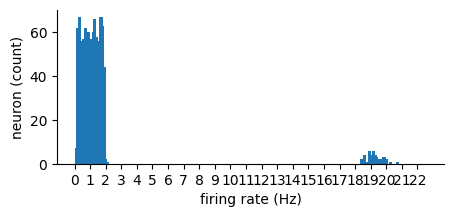

In [72]:
all_recordings = sf.load_spikeforest_recordings(uri)
sorted_true, firing_rates_synth_monotrode = plot_all_rec(all_recordings)

In [76]:
# save firing rates
parent_path = os.path.dirname(SYNTH_MONOTRODE_FR_FILE_PATH)
if not os.path.isdir(parent_path):
    os.makedirs(parent_path)
np.save(SYNTH_MONOTRODE_FR_FILE_PATH, firing_rates_synth_monotrode)

### Buccino 2020

In [14]:
import spikeinterface as si

recording = si.load_extractor(BUCCI_RECORDING_PATH)
sorted_true = si.load_extractor(BUCCI_GT_SORTING_PATH)

buccino_firing_rates = []

# calculate firing rate
for unit_id in sorted_true.get_unit_ids():

    # get spike train
    st = sorted_true.get_unit_spike_train(unit_id=unit_id)

    # calculate firing rate
    buccino_firing_rates += [len(st) / recording.get_total_duration()]

Versions are not the same. This might lead to errors. Use  spikeinterface version 0.96.1
Versions are not the same. This might lead to errors. Use  spikeinterface version 0.96.1


In [16]:
# save firing rates
parent_path = os.path.dirname(BUCCI_FR_FILE_PATH)
if not os.path.isdir(parent_path):
    os.makedirs(parent_path)
np.save(BUCCI_FR_FILE_PATH, buccino_firing_rates)

## Our NMC

In [22]:
# recording = si.load_extractor(NMC_RECORDING_PATH)
NMC_RECORDING_PATH

'/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/dataeng/0_silico/neuropixels_lfp_10m_2023_02_19/f3c730ef-8dd9-4d6d-8c18-3ddb7d3eeee7/campaign/raw/traces.pkl'

In [27]:
recording = si.load_extractor(NMC_RECORDING_PATH)
sorted_true = si.load_extractor(NMC_GT_SORTING_PATH)

nmc_firing_rates = []

nmc_spike_count = []

# calculate firing rate
for unit_id in sorted_true.get_unit_ids():

    # get spike train
    st = sorted_true.get_unit_spike_train(unit_id=unit_id)

    # calculate firing rate
    nmc_firing_rates += [len(st) / recording.get_total_duration()]

    # count spikes firing rate
    nmc_spike_count += [len(st)]

Versions are not the same. This might lead to errors. Use  spikeinterface version 0.96.1
Versions are not the same. This might lead to errors. Use  spikeinterface version 0.96.1


In [26]:
# save firing rates
parent_path = os.path.dirname(NMC_FR_FILE_PATH)
if not os.path.isdir(parent_path):
    os.makedirs(parent_path)
np.save(NMC_FR_FILE_PATH, nmc_firing_rates)

In [33]:
import collections

collections.Counter(np.sort(nmc_spike_count))

Counter({1: 56,
         2: 36,
         4: 19,
         3: 17,
         5: 13,
         7: 13,
         8: 13,
         6: 12,
         11: 10,
         15: 9,
         12: 8,
         14: 7,
         16: 7,
         18: 7,
         9: 6,
         13: 6,
         30: 6,
         26: 5,
         27: 5,
         10: 4,
         17: 4,
         19: 4,
         20: 4,
         21: 3,
         22: 3,
         23: 3,
         25: 3,
         34: 3,
         67: 3,
         75: 3,
         76: 3,
         82: 3,
         94: 3,
         97: 3,
         118: 3,
         29: 2,
         31: 2,
         32: 2,
         33: 2,
         36: 2,
         44: 2,
         45: 2,
         47: 2,
         49: 2,
         59: 2,
         63: 2,
         74: 2,
         78: 2,
         81: 2,
         83: 2,
         93: 2,
         99: 2,
         102: 2,
         142: 2,
         154: 2,
         300: 2,
         410: 2,
         528: 2,
         983: 2,
         28: 1,
         37: 1,
         38: 1,


## References

(1) https://github.com/flatironinstitute/spikeforest/blob/main/examples/load_extractors_for_recording.py

(2) https://spikeforest.flatironinstitute.org

(3) https://spikeforest.flatironinstitute.org/studyset/PAIRED_BOYDEN